# Plotting with Pandas

![pandas_drawing](images/pandas_drawing.webp)





Making informative visualizations is an important task in data analysis. 

Python has many nice, useful libraries that can be used for plotting.

1. Matplotlib: Matplotlib is one of the most widely used Python plotting libraries,
2. Seaborn: Seaborn is a high-level interface for drawing attractive statistical graphics that is built on top of Matplotlib.
3. Bokeh: Bokeh is a modern plotting library for static and interactive web-based plots including graphs, maps, and charts. 
4. Plotly: Similar in some ways to Bokeh, Plotly is a modern plotting library for static and interactive web-based plots.
5. ggplot: ggplot is a Python plotting environment for those familiar with creating plots in R using ggplot2. 
6. HoloViews and GeoViews: HoloViews and GeoViews aim to let the data visualize itself.

In this chapter you will mainly use Matplotlib and plotting provided by Pandas.

## Pandas Plotting Basics

In [4]:
import pandas as pd

Let us create a pandas series object with square of first 10 numbers

In [5]:
sample = pd.Series([i**2 for i in range(10)])
sample

0     0
1     1
2     4
3     9
4    16
5    25
6    36
7    49
8    64
9    81
dtype: int64

Now for plotting you can just use the plot() method

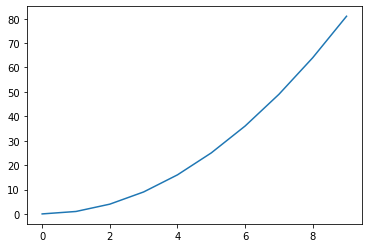

In [6]:
sample.plot();

You can change the style of the line using the style parameter.

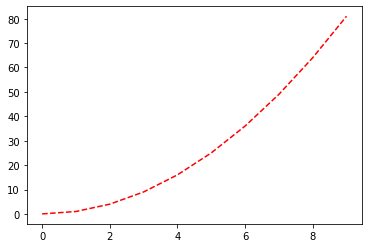

In [7]:
sample.plot(style="r--");

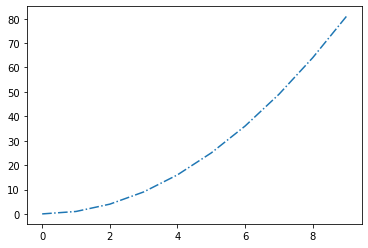

In [8]:
sample.plot(style="-.");

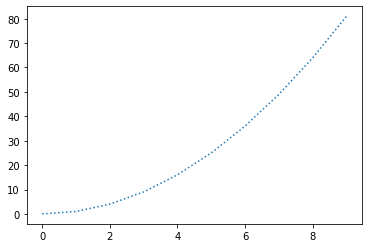

In [9]:
sample.plot(style=":");

Now let us plot a DataFrame with columns x, x^2, x^3,x^4

In [10]:
data = pd.DataFrame([i for i in range(1,11)],columns=['x'],index = [i for i in range(1,11)])
data['x2'] = data['x']**2
data['x3'] = data['x']**3
data['x4'] = data['x']**4

In [11]:
data

,x,x2,x3,x4
1,1,1,1,1
2,2,4,8,16
3,3,9,27,81
4,4,16,64,256
5,5,25,125,625
6,6,36,216,1296
7,7,49,343,2401
8,8,64,512,4096
9,9,81,729,6561
10,10,100,1000,10000


<AxesSubplot:>

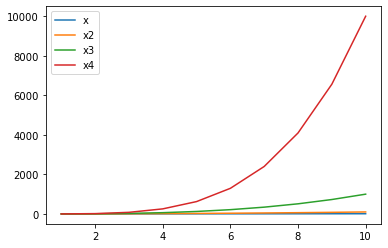

In [12]:
data.plot()

If you want to plot the y values in log axis you colud use the optional parameter logy

<AxesSubplot:>

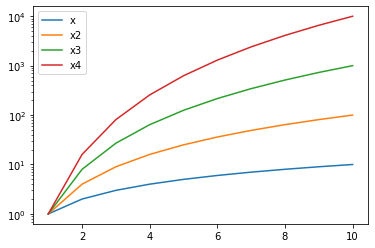

In [13]:
data.plot(logy = True)

Lets add a title to our plot. 

<AxesSubplot:title={'center':'Our First Plot'}>

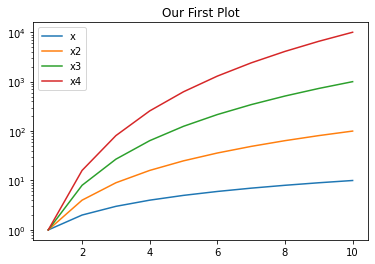

In [14]:
data.plot(logy = True,title = 'Our First Plot')

Let's add labels for x axis and y axis

<AxesSubplot:title={'center':'Our First Plot'}, xlabel='X', ylabel='Values'>

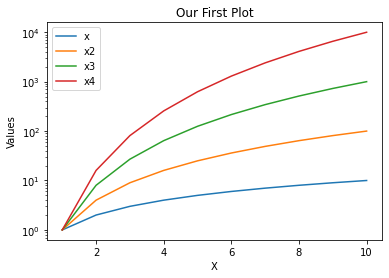

In [15]:
data.plot(logy = True,title = 'Our First Plot',xlabel = 'X',ylabel = 'Values')

We can create seperate sub plots for each column using the subplot parameter

array([<AxesSubplot:xlabel='X', ylabel='Values'>,
       <AxesSubplot:xlabel='X', ylabel='Values'>,
       <AxesSubplot:xlabel='X', ylabel='Values'>,
       <AxesSubplot:xlabel='X', ylabel='Values'>], dtype=object)

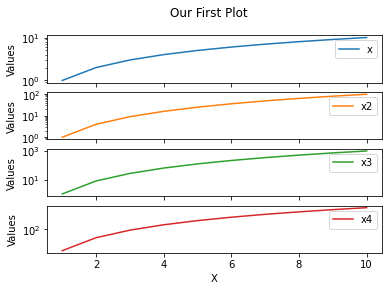

In [16]:
data.plot(logy = True,title = 'Our First Plot',xlabel = 'X',ylabel = 'Values',subplots=True)

Let's create a 2(rows) x 2(columns) subplot structure 

array([[<AxesSubplot:xlabel='X', ylabel='Values'>,
        <AxesSubplot:xlabel='X', ylabel='Values'>],
       [<AxesSubplot:xlabel='X', ylabel='Values'>,
        <AxesSubplot:xlabel='X', ylabel='Values'>]], dtype=object)

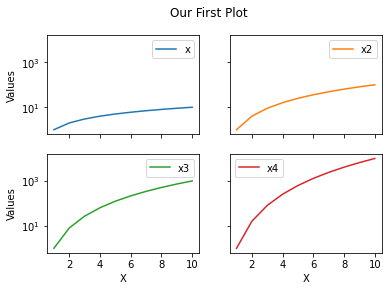

In [17]:
data.plot(logy = True,title = 'Our First Plot',xlabel = 'X',ylabel = 'Values',subplots=True,layout=(2,2),sharey=True)

Now let us create a bar chart.

In [18]:
sampleData = pd.DataFrame([['Cleveland',53000],['Columbus',60000],['Cincinnati',50000]],columns = ['City','Case Count'])

In [19]:
sampleData

,City,Case Count
0,Cleveland,53000
1,Columbus,60000
2,Cincinnati,50000


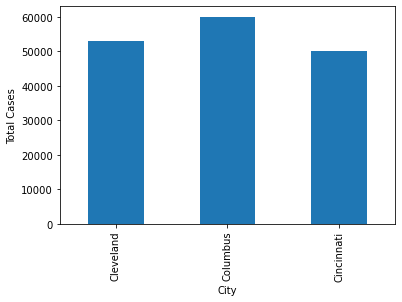

In [20]:
sampleData.plot.bar(x='City',ylabel='Total Cases',legend=False);

## A practical example

Let us look into a practical example for plotting. 

### Input Data

For this plotting example we will use the COVID-19 case surveillance public use data provided by CDC (https://data.cdc.gov/Case-Surveillance/COVID-19-Case-Surveillance-Public-Use-Data/vbim-akqf).
We are going to use a curated dataset which has records only from Ohio. Let us explore the dataset. 

In [3]:
import pandas as pd
from matplotlib.ticker import FormatStrFormatter, StrMethodFormatter

In [4]:
# our dataset is in parquet form (which is a format particularly suitable for large datasets)
dataset = pd.read_parquet(r'../../largedatasets/COVID-19_Case_Surveillance_Public_Use_Data_with_Geography_ohio/COVID-19_Case_Surveillance_Public_Use_Data_with_Geography_ohio.parquet')
dataset.head()

,case_month,county_fips_code,age_group,sex,race,ethnicity
0,2022-01,39029.0,50 to 64 years,Male,Unknown,Unknown
1,2021-01,39057.0,65+ years,Female,White,Non-Hispanic/Latino
2,2021-12,39113.0,0 - 17 years,Male,White,Non-Hispanic/Latino
3,2022-02,39087.0,0 - 17 years,Male,White,Non-Hispanic/Latino
4,2021-11,39017.0,0 - 17 years,Male,White,Non-Hispanic/Latino


### A basic time series plot for Covid cases in Ohio

We will first group by case_month

In [23]:
caseTotals = dataset.groupby('case_month')['case_month'].count()
caseTotals

case_month
2020-01       160
2020-02       204
2020-03      5802
2020-04     16317
2020-05     13053
2020-06     19489
2020-07     35757
2020-08     27773
2020-09     29213
2020-10     68775
2020-11    227332
2020-12    250618
2021-01    215094
2021-02     65181
2021-03     55670
2021-04     54086
2021-05     26736
2021-06      7667
2021-07     20846
2021-08    106841
2021-09    192036
2021-10    126215
2021-11    163678
2021-12    368871
2022-01    514587
2022-02     62754
2022-03     14987
2022-04     27703
2022-05     78215
2022-06     73154
2022-07    111188
2022-08    112832
2022-09     69376
2022-10     28802
Name: case_month, dtype: int64

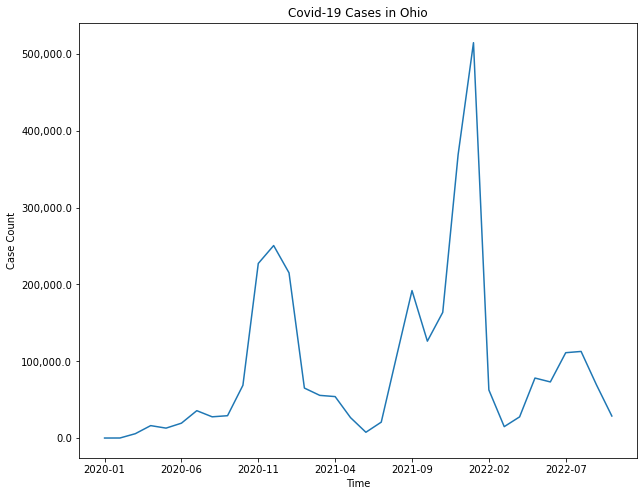

In [24]:
ax = caseTotals.plot(figsize=(10,8),title='Covid-19 Cases in Ohio',xlabel='Time',ylabel='Case Count')
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,}'))

Now let us try to plot a cumulative curve. 

In [25]:
cumulativeData = caseTotals.cumsum()

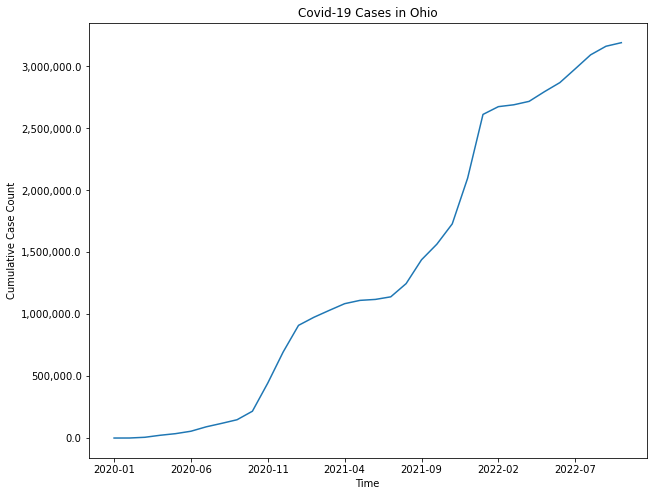

In [26]:
ax1 = cumulativeData.plot(figsize=(10,8),title='Covid-19 Cases in Ohio',xlabel='Time',ylabel='Cumulative Case Count')
ax1.yaxis.set_major_formatter(StrMethodFormatter('{x:,}'))

### Covid Case distribution among various Categories

Now let us create a bar chart for various age groups.

In [27]:
# We will group by age_group
ageGroup = dataset.groupby('age_group')['age_group'].count()
ageGroup

age_group
0 - 17 years       457966
18 to 49 years    1611540
50 to 64 years     616928
65+ years          465835
Missing              2033
Name: age_group, dtype: int64

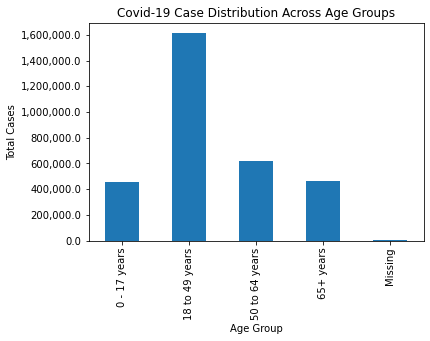

In [28]:
ax3 = ageGroup.plot.bar(title='Covid-19 Case Distribution Across Age Groups',ylabel='Total Cases',xlabel='Age Group')
ax3.yaxis.set_major_formatter(StrMethodFormatter('{x:,}'))

Let us create a bar chart for the case distribution with respect to race. 

In [29]:
raceGroup = dataset.groupby('race')['race'].count()
raceGroup

race
American Indian/Alaska Native        420
Asian                              34911
Black                             336958
Missing                              156
Multiple/Other                     56024
Unknown                           495154
White                            1947787
Name: race, dtype: int64

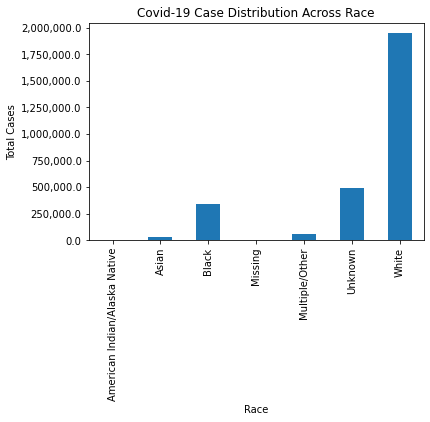

In [30]:
ax4 = raceGroup.plot.bar(title='Covid-19 Case Distribution Across Race',ylabel='Total Cases',xlabel='Race')
ax4.yaxis.set_major_formatter(StrMethodFormatter('{x:,}'))

Now let us switch gears and move to a more advanced nested bar chart. In this case we will plot groups based on race and age. Each race will have different age categories normalized based on total count. 

In [31]:
raceAgeGroup = dataset.groupby(['race','age_group'],as_index=False).size()
raceAgeGroup

,race,age_group,size
0,American Indian/Alaska Native,0 - 17 years,81
1,American Indian/Alaska Native,18 to 49 years,328
2,American Indian/Alaska Native,50 to 64 years,11
3,Asian,0 - 17 years,5720
4,Asian,18 to 49 years,24541
5,Asian,50 to 64 years,3345
6,Asian,65+ years,1305
7,Black,0 - 17 years,55154
8,Black,18 to 49 years,191389
9,Black,50 to 64 years,56912


For this plot we want only Asian, Black, Multiple/Other, and White categories

In [32]:
#lets extract out these categories
raceAgeGroup = raceAgeGroup[raceAgeGroup.race.isin(['Asian','Black','White','Multiple/Other'])]
raceAgeGroup

,race,age_group,size
3,Asian,0 - 17 years,5720
4,Asian,18 to 49 years,24541
5,Asian,50 to 64 years,3345
6,Asian,65+ years,1305
7,Black,0 - 17 years,55154
8,Black,18 to 49 years,191389
9,Black,50 to 64 years,56912
10,Black,65+ years,33503
14,Multiple/Other,0 - 17 years,12413
15,Multiple/Other,18 to 49 years,34911


Now we need to create seperate columns for the age_group as they are going to be our subcategories with in our race category. For this we use a method called pivot().

![pivot](images/pivot.png)

In [33]:
raceAgeGroupTotals = raceAgeGroup.pivot(index='race',columns='age_group',values='size')
raceAgeGroupTotals

age_group,0 - 17 years,18 to 49 years,50 to 64 years,65+ years
race,,,,
Asian,5720,24541,3345,1305
Black,55154,191389,56912,33503
Multiple/Other,12413,34911,6182,2518
White,256233,960140,396745,334669


Now we need to divide every value by their row total for normalizing. sum(axis = 1) method gives the row totals. 

In [34]:
rowSums = raceAgeGroupTotals.sum(axis=1)
rowSums

race
Asian               34911
Black              336958
Multiple/Other      56024
White             1947787
dtype: int64

Then we can divide the values in each row with the corresponding row totals. 

In [35]:
rowRatios = raceAgeGroupTotals.div(rowSums,axis=0)
rowRatios

age_group,0 - 17 years,18 to 49 years,50 to 64 years,65+ years
race,,,,
Asian,0.163845,0.702959,0.095815,0.037381
Black,0.163682,0.567991,0.168899,0.099428
Multiple/Other,0.221566,0.623144,0.110346,0.044945
White,0.131551,0.492939,0.203690,0.171820


Now we can convert the values into percentages by multiplying with 100.

In [36]:
rowPercentages = rowRatios*100.0
rowPercentages

age_group,0 - 17 years,18 to 49 years,50 to 64 years,65+ years
race,,,,
Asian,16.384521,70.295895,9.581507,3.738077
Black,16.368212,56.799067,16.889939,9.942782
Multiple/Other,22.156576,62.314365,11.034557,4.494502
White,13.155083,49.293891,20.369014,17.182012


Just for aesthetic purposes we can conver the percentages to integer numbers

In [37]:
rowPercentages = rowPercentages.astype(int)
rowPercentages

age_group,0 - 17 years,18 to 49 years,50 to 64 years,65+ years
race,,,,
Asian,16,70,9,3
Black,16,56,16,9
Multiple/Other,22,62,11,4
White,13,49,20,17


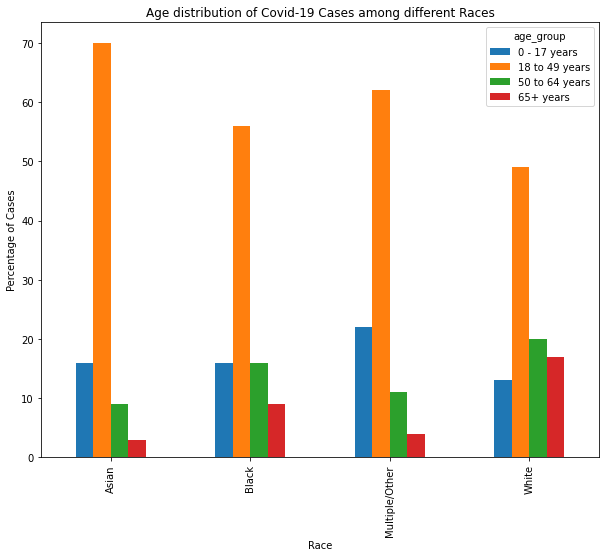

In [38]:
ax5 = rowPercentages.plot.bar(figsize=(10,8),xlabel = 'Race',ylabel = 'Percentage of Cases',title = 'Age distribution of Covid-19 Cases among different Races')

We can also create a plot to see the temporal changes in Covid-19 cases across various age groups. 

In [39]:
temporalAgeGroup = dataset.groupby(['case_month','age_group'],as_index=False).size()
temporalAgeGroup

,case_month,age_group,size
0,2020-02,18 to 49 years,25
1,2020-03,0 - 17 years,43
2,2020-03,18 to 49 years,2206
3,2020-03,50 to 64 years,1499
4,2020-03,65+ years,1189
...,...,...,...
141,2022-09,Missing,11
142,2022-10,0 - 17 years,2522
143,2022-10,18 to 49 years,11180
144,2022-10,50 to 64 years,5668


Now we can pivot this table based on age_group to get seperate columns for each age group

In [40]:
temporalAgeGroup = temporalAgeGroup.pivot(index='case_month',columns='age_group',values='size')
temporalAgeGroup.head()

age_group,0 - 17 years,18 to 49 years,50 to 64 years,65+ years,Missing
case_month,,,,,
2020-02,NaN,25.0,NaN,NaN,NaN
2020-03,43.0,2206.0,1499.0,1189.0,NaN
2020-04,187.0,7447.0,3786.0,3966.0,NaN
2020-05,518.0,6193.0,2495.0,2817.0,NaN
2020-06,1223.0,11180.0,3277.0,2706.0,NaN


Let us fill the missing NaN values with 0's and then remove the missing column.

In [41]:
temporalAgeGroup.fillna(0,inplace=True)
temporalAgeGroup.drop(columns=['Missing'],inplace=True)
temporalAgeGroup.head()

age_group,0 - 17 years,18 to 49 years,50 to 64 years,65+ years
case_month,,,,
2020-02,0.0,25.0,0.0,0.0
2020-03,43.0,2206.0,1499.0,1189.0
2020-04,187.0,7447.0,3786.0,3966.0
2020-05,518.0,6193.0,2495.0,2817.0
2020-06,1223.0,11180.0,3277.0,2706.0


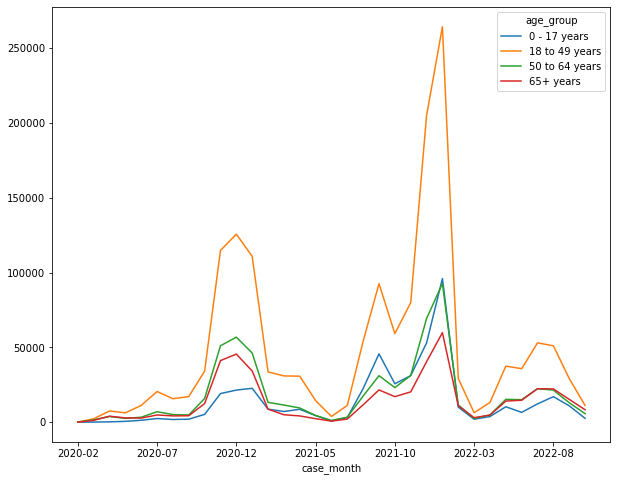

In [42]:
ax6 = temporalAgeGroup.plot(figsize=(10,8))

### Plotting Covid-19 case distribution across Counties in Ohio

If you check the dataset dataframe we do have a column called county_fips_code which is also called Federal Information Processing System (FIPS) Codes for States and Counties. For example the fips code for Cuyahoga county is 39035. Since we don't have the names for the counties how will we use County names for plotting???

You could always use joins. Let's utilize the file UID_ISO_FIPS_LookUp_Table.csv present in the data folder (we have already used this file before)

In [43]:
countyDetails = pd.read_csv(r'data/UID_ISO_FIPS_LookUp_Table.csv')

Now let's aggregate our Covid-19 dataset based on case_month and county_fips_code. 

In [44]:
temporalCounty = dataset.groupby(['case_month','county_fips_code'],as_index=False).size()
temporalCounty.head()

,case_month,county_fips_code,size
0,2020-01,39035.0,13
1,2020-01,39061.0,11
2,2020-02,39035.0,27
3,2020-02,39043.0,12
4,2020-02,39049.0,11


Now let us merge this DataFrame with the countyDetails DataFrame.

In [45]:
temporalCounty = temporalCounty.merge(countyDetails[['FIPS','Admin2']],left_on='county_fips_code',right_on='FIPS')
temporalCounty.head()

,case_month,county_fips_code,size,FIPS,Admin2
0,2020-01,39035.0,13,39035.0,Cuyahoga
1,2020-02,39035.0,27,39035.0,Cuyahoga
2,2020-03,39035.0,1039,39035.0,Cuyahoga
3,2020-04,39035.0,1487,39035.0,Cuyahoga
4,2020-05,39035.0,1992,39035.0,Cuyahoga


Now we need to only retain case_month, size and Admin2 (let us rename Admin2 to County).

In [46]:
temporalCounty = temporalCounty[['case_month','Admin2','size']].rename(columns={'Admin2':'County'})
temporalCounty.head()

,case_month,County,size
0,2020-01,Cuyahoga,13
1,2020-02,Cuyahoga,27
2,2020-03,Cuyahoga,1039
3,2020-04,Cuyahoga,1487
4,2020-05,Cuyahoga,1992


Now just for demonstration we are going to select Cuyahoga (Cleveland), Franklin (Columbus), and Butler (Cincinnati). 

In [47]:
temporalCountyDemo = temporalCounty[temporalCounty['County'].isin(['Cuyahoga','Franklin','Butler'])]
temporalCountyDemo.head()

,case_month,County,size
0,2020-01,Cuyahoga,13
1,2020-02,Cuyahoga,27
2,2020-03,Cuyahoga,1039
3,2020-04,Cuyahoga,1487
4,2020-05,Cuyahoga,1992


Now we can pivot this table so that we do have seperate columns for these counties (and fill missing values with 0).

In [48]:
temporalCountyDemo = temporalCountyDemo.pivot(index='case_month',columns='County',values='size').fillna(0)
temporalCountyDemo.head()

County,Butler,Cuyahoga,Franklin
case_month,,,
2020-01,0.0,13.0,0.0
2020-02,0.0,27.0,11.0
2020-03,113.0,1039.0,807.0
2020-04,278.0,1487.0,2152.0
2020-05,441.0,1992.0,2654.0


Now we can plot this DataFrame

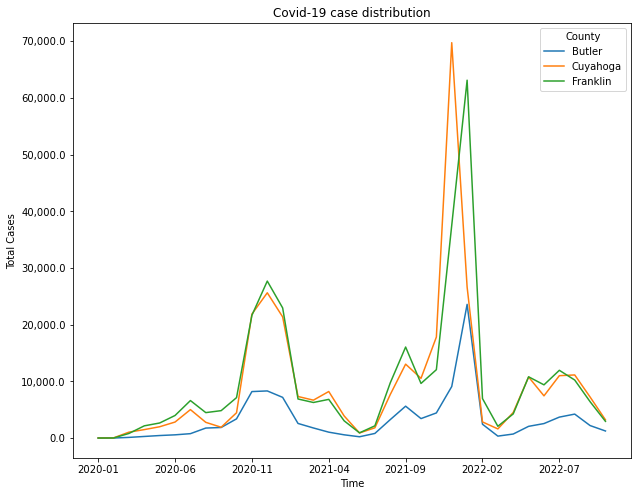

In [49]:
ax7 = temporalCountyDemo.plot(figsize=(10,8),xlabel='Time',ylabel='Total Cases',title='Covid-19 case distribution')
ax7.yaxis.set_major_formatter(StrMethodFormatter('{x:,}'))

### Saving a plot

You can save a plot by retreiving the figure object from the axes object returned by the plot() mwthod and then by calling the savefig() method from the figure object.  
Let's save the last plot that we have created (ax7)

In [50]:
fig7 = ax7.get_figure()

Now let's save the figure as a png file in the current folder with the name covid19distribution.png

In [51]:
fig7.savefig('covid19distribution.png',facecolor='white', transparent=False,dpi=300)

So we wrap up our session on plotting with Pandas. While graphs and charts could provide valuable information, they completely hides the underlying spatial patterns. In the upcoming chapters we are going to learn about geospatial visualization which is a key tool for identifying underlying spatial patterns. 